In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.14-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [ ]:
%cd drive/

/content/drive


In [ ]:
df = pd.read_csv("diabetes2.csv")

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().values.any()

False

In [ ]:
import seaborn as sns

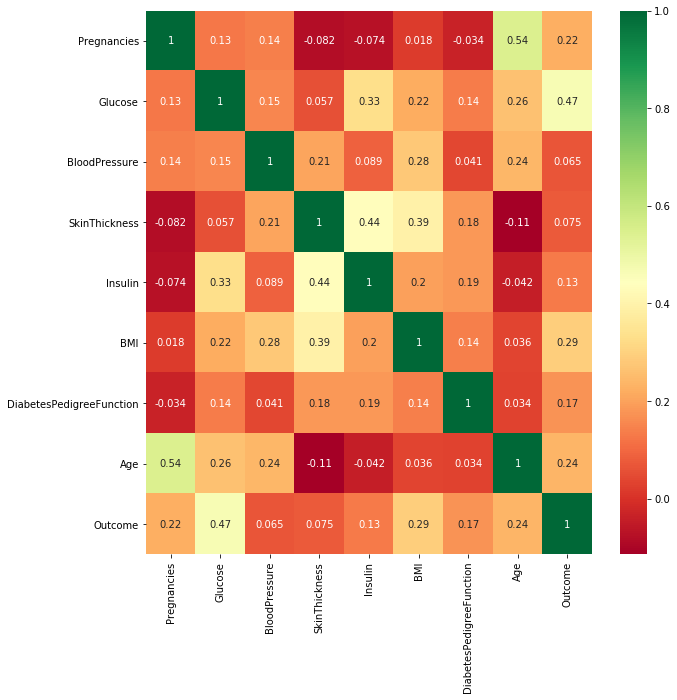

In [ ]:
corrmat=df.corr()
toop_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[toop_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6e6100ef0>,
      dtype=object)

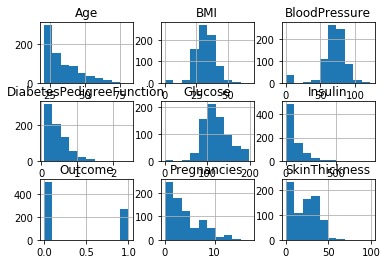

In [ ]:
df.hist()

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
diabetes_true_count=len(df.loc[df['Outcome']==True])
diabetes_false_count=len(df.loc[df['Outcome']==False])

In [ ]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [ ]:
from sklearn.model_selection import train_test_split
feature_columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
predicted_class=['Outcome']

In [ ]:
x=df[feature_columns].values
y=df[predicted_class].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10)

In [ ]:
print("total number of rows : {0}".format(len(df)))
print("number of rows missing Pregnancies_con: {0}".format(len(df.loc[df['Pregnancies']==0])))
print("number of rows missing Glucose_con: {0}".format(len(df.loc[df['Glucose']==0])))
print("number of rows missing diastolic_bp: {0}".format(len(df.loc[df['BloodPressure']==0])))
print("number of rows missing insulin: {0}".format(len(df.loc[df['Insulin']==0])))
print("number of rows missing bmi: {0}".format(len(df.loc[df['BMI']==0])))
print("number of rows missing diab_pred: {0}".format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print("number of rows missing age: {0}".format(len(df.loc[df['Age']==0])))
print("number of rows missing skin: {0}".format(len(df.loc[df['SkinThickness']==0])))

total number of rows : 768
number of rows missing Pregnancies_con: 111
number of rows missing Glucose_con: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [ ]:
from sklearn.preprocessing import Imputer

In [ ]:
fill_value=Imputer(missing_values=0, strategy="mean", axis=0)
x_train=fill_value.fit_transform(x_train)
x_test=fill_value.fit_transform(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(random_state=20)
random_forest_model.fit(x_train,y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [ ]:
predit_train_data=random_forest_model.predict(x_test)
from sklearn import  metrics
print("Accuracy={0:.2f}".format(metrics.accuracy_score(y_test,predit_train_data)))

Accuracy=0.76


In [ ]:
n_true = len(df.loc[df['Outcome'] == True])
n_false = len(df.loc[df['Outcome'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


In [ ]:
from sklearn.linear_model import LogisticRegression

diab_lr_model = LogisticRegression(C=0.8, random_state=10)
diab_lr_model.fit(x_train, y_train.ravel())
lr_test_predict = diab_lr_model.predict(x_tste)

print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, lr_test_predict)))
print("")

Model Accuracy: 0.73



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_test_predict, labels=[1, 0]))


Confusion Matrix
[[ 39  48]
 [ 15 129]]


In [ ]:
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_test_predict, labels=[1, 0]))


Classification Report
              precision    recall  f1-score   support

           1       0.72      0.45      0.55        87
           0       0.73      0.90      0.80       144

    accuracy                           0.73       231
   macro avg       0.73      0.67      0.68       231
weighted avg       0.73      0.73      0.71       231



In [ ]:
from sklearn.linear_model import LogisticRegressionCV
diab_lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=20, Cs=3, cv=10, refit=True, class_weight="balanced")
diab_lr_cv_model.fit(x_train, y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=20, refit=True, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [ ]:
lr_cv_test_predict = diab_lr_cv_model.predict(x_test)

print("Model Accuracy: {0:.2f}".format(metrics.accuracy_score(y_test, lr_cv_test_predict)))
print("")

Model Accuracy: 0.74



In [ ]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, lr_cv_test_predict, labels=[1, 0]))
print("")

Confusion Matrix
[[ 62  25]
 [ 35 109]]



In [ ]:
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_test_predict, labels=[1, 0]))


Classification Report
              precision    recall  f1-score   support

           1       0.64      0.71      0.67        87
           0       0.81      0.76      0.78       144

    accuracy                           0.74       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.74      0.74       231

